<a href="https://colab.research.google.com/github/AfnanHussain10/GlowingSoft_W5_Day1/blob/finale-code/AfnanHussain_Day1_W5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
df = pd.DataFrame(columns=['CustomerID','Age','Gender','MartialStatus','AnnualIncome (USD)','TotalPurchases','PreferredCategory'])
df

,CustomerID,Age,Gender,MartialStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory


In [ ]:
id = [1001,1002,1003,1004,1005]
age = [33,28,42,51,37]
gender = ['Male','Female','Male','Female','Male']
status = ['Married','Single','Married','Single','Divorced']
income = [65000,45000,55000,80000,58000]
purchases = [18,15,20,12,10]
category = ['Electronics','Appliances','Electronics','Electronics','Appliances']


In [ ]:
random.seed(42)
app_choice = ['Electronics','Appliances']
status_choice = ['Married','Single','Divorced']
gender_choice = ['Male','Female']
for i in range(6,501):
  num = random.randint(0,2)
  Age = random.randint(15,80)
  g = random.choice(gender_choice)
  s = random.choice(status_choice)
  Income = random.randint(10000,100000)
  purchase = random.randint(1,100)
  cat = random.choice(app_choice)
  id.append(1000+i)
  age.append(Age)
  gender.append(g)
  income.append(Income)
  purchases.append(purchase)
  category.append(cat)
  status.append(s)

In [ ]:
df['CustomerID'] = id
df['Age'] = age
df['Gender'] = gender
df['MartialStatus'] = status
df['AnnualIncome (USD)'] = income
df['TotalPurchases'] = purchases
df['PreferredCategory'] = category
df

,CustomerID,Age,Gender,MartialStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
0,1001,33,Male,Married,65000,18,Electronics
1,1002,28,Female,Single,45000,15,Appliances
2,1003,42,Male,Married,55000,20,Electronics
3,1004,51,Female,Single,80000,12,Electronics
4,1005,37,Male,Divorced,58000,10,Appliances
...,...,...,...,...,...,...,...
495,1496,55,Female,Married,80244,46,Electronics
496,1497,54,Female,Single,25717,12,Electronics
497,1498,53,Male,Married,52964,19,Electronics
498,1499,46,Female,Single,77300,7,Appliances


In [ ]:
df.isna().sum()

CustomerID            0
Age                   0
Gender                0
MartialStatus         0
AnnualIncome (USD)    0
TotalPurchases        0
PreferredCategory     0
dtype: int64

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
for col in df.columns:
  if df[col].dtype == 'int' or df[col].dtype == 'float64':
    outliers = find_outliers_IQR(df[col])
    print("Number of outliers in",col,":",len(outliers))

Number of outliers in CustomerID : 0
Number of outliers in Age : 0
Number of outliers in AnnualIncome (USD) : 0
Number of outliers in TotalPurchases : 0


In [ ]:
import plotly.express as px
import seaborn as sns

In [ ]:
gender_group = df.groupby('Gender')['AnnualIncome (USD)'].agg(['sum', 'mean', 'max'])
fig = px.bar(x=gender_group.index, y=gender_group['mean'], labels={'x': 'Gender', 'y': 'Mean Annual Income (USD)'},color = gender_group.index)
fig.show()

In [ ]:
fig = px.bar(x=gender_group.index, y=gender_group['max'], labels={'x': 'Gender', 'y': 'Max Annual Income (USD)'},color = gender_group.index)
fig.show()

In [ ]:
status_group = df.groupby('MartialStatus')['TotalPurchases'].agg(['sum', 'mean', 'max'])
fig = px.bar(x=status_group.index, y=status_group['mean'], labels={'x': 'Martial Status', 'y': 'Mean Total Purchases'},color = status_group.index)
fig.show()

In [ ]:
cat_group = df.groupby('PreferredCategory')['TotalPurchases'].agg(['sum', 'mean', 'max'])
fig = px.bar(x=cat_group.index, y=cat_group['mean'], labels={'x': 'Preferred Category', 'y': 'Mean Total Purchases'},color = cat_group.index)
fig.show()

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [ ]:
scaler = StandardScaler()
df['AnnualIncome (USD)'] = scaler.fit_transform(df[['AnnualIncome (USD)']])
df['TotalPurchases'] = scaler.fit_transform(df[['TotalPurchases']])

In [ ]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['MartialStatus'] = encoder.fit_transform(df['MartialStatus'])
df['PreferredCategory'] = encoder.fit_transform(df['PreferredCategory'])

In [ ]:
df

,CustomerID,Age,Gender,MartialStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
0,1001,33,1,1,0.381409,-1.091566,1
1,1002,28,0,2,-0.380514,-1.196055,0
2,1003,42,1,1,0.000447,-1.021906,1
3,1004,51,0,2,0.952851,-1.300545,1
4,1005,37,1,0,0.114736,-1.370204,0
...,...,...,...,...,...,...,...
495,1496,55,0,1,0.962146,-0.116332,1
496,1497,54,0,2,-1.115122,-1.300545,1
497,1498,53,1,1,-0.077116,-1.056736,1
498,1499,46,0,2,0.849991,-1.474694,0


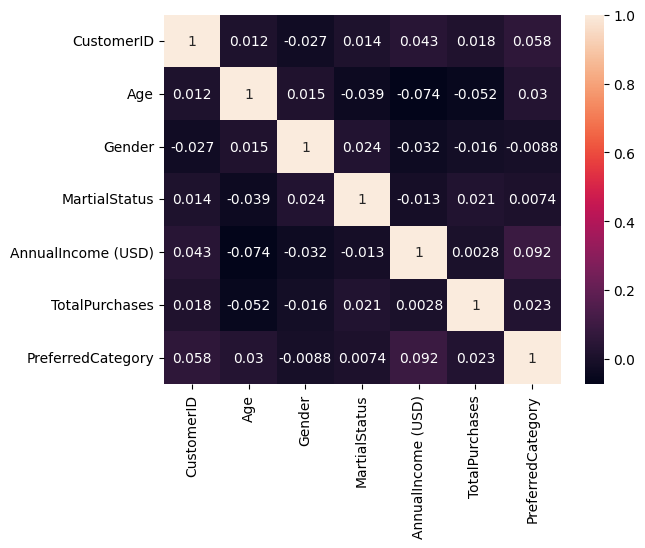

In [ ]:
correlation = df.corr()
sns.heatmap(correlation,annot=True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

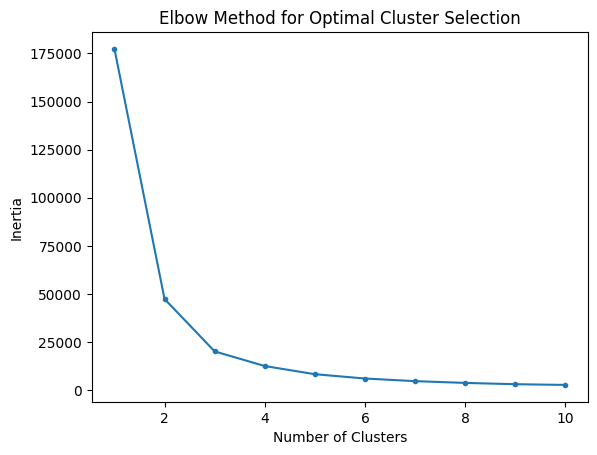

In [ ]:
inertias = []
features_for_segmentation = ['Age', 'AnnualIncome (USD)', 'TotalPurchases']
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  model = kmeans.fit(df[features_for_segmentation])
  inertias.append(model.inertia_)

plt.plot(range(1, 11), inertias, marker='.')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Selection')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



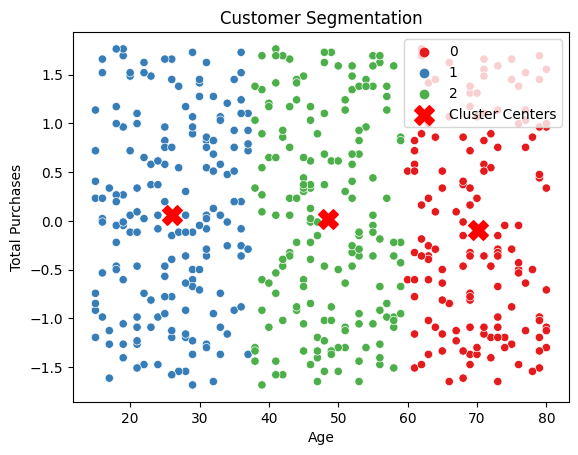

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features_for_segmentation])
sns.scatterplot(data=df, x='Age', y='TotalPurchases', hue='Cluster', palette='Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=200, c='red', marker='X', label='Cluster Centers')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Total Purchases')
plt.legend()
plt.show()